In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import line_aa as draw_line
from IPython import display

In [105]:
shape = (180, 180)
line_list = [{
    "bar_speed" : 4, # px/s
    "bar_thick" : 3, # px (not implemented)
    "bar_slope" : np.array([0, 1.0]), # ang from x in rad
    "bar_direction" : np.array([1, 0.0]), # x and y components of the motion
    "bar_length" : 30,
    "pos_start" : [10 , 0]
},
{
    "bar_speed" : 4, # px/s
    "bar_thick" : 3, # px (not implemented)
    "bar_slope" : np.array([1.0, 0.0]), # ang from x in rad
    "bar_direction" : np.array([1, 0.0]), # x and y components of the motion
    "bar_length" : 40,
    "pos_start" : [10 , 30]
},
{
    "bar_speed" : 4, # px/s
    "bar_thick" : 3, # px (not implemented)
    "bar_slope" : np.array([0, 1.0]), # ang from x in rad
    "bar_direction" : np.array([1.0, 0.0]), # rad
    "bar_length" : 30,
    "pos_start" : [50, 0]
 },
{
    "bar_speed" : 2, # px/s
    "bar_thick" : 3, # px (not implemented)
    "bar_slope" : np.array([0.0, 1.0]), # ang from x in rad
    "bar_direction" : np.array([1, 0.0]), # x and y components of the motion
    "bar_length" : 80,
    "pos_start" : [40, 0]
},
{
    "bar_speed" : 2, # px/s
    "bar_thick" : 3, # px (not implemented)
    "bar_slope" : np.array([0, 1.0]), # ang from x in rad
    "bar_direction" : np.array([1.0, 0.0]), # rad
    "bar_length" : 80,
    "pos_start" : [90, 0]
 },
{
    "bar_speed" : 1, # px/s
    "bar_thick" : 3, # px (not implemented)
    "bar_slope" : np.array([0.0, 1.0]), # ang from x in rad
    "bar_direction" : np.array([1, 0.0]), # x and y components of the motion
    "bar_length" : 150,
    "pos_start" : [40, 0]
},
{
    "bar_speed" : 1, # px/s
    "bar_thick" : 3, # px (not implemented)
    "bar_slope" : np.array([0, 1.0]), # ang from x in rad
    "bar_direction" : np.array([1.0, 0.0]), # rad
    "bar_length" : 150,
    "pos_start" : [90, 0]
 }
]
sim_duration = 5. # seconds
time_res = 0.01 # sec

In [106]:
def plot_line(shape, line, t):
    img = np.zeros(shape)
    pos_start = line["pos_start"]
    bar_direction = line["bar_direction"]
    bar_speed = line["bar_speed"]
    bar_slope = line["bar_slope"]
    bar_length = line["bar_length"]
    
    pos_f = (np.array(pos_start + bar_direction * bar_speed * t))
    #print(pos_f)
    poss = np.array([
        [np.floor(pos_f[0]), np.floor(pos_f[1])],
        [np.floor(pos_f[0]), np.ceil(pos_f[1])],
        [np.ceil(pos_f[0]), np.floor(pos_f[1])],
        [np.ceil(pos_f[0]), np.ceil(pos_f[1])],
    ])
    for pos in poss[0:1]:
        #pos = pos.astype(int)
        pos = np.floor(pos_f).astype(int)
        #print(pos)
        pos_end = [pos[0] + bar_slope[0]*bar_length, pos[1] + bar_slope[1]*bar_length]
        pos_end = np.array(pos_end).astype(int)
        rr, cc, val = draw_line(pos[1], pos[0], pos_end[1], pos_end[0])
        mask = [True if r>=0 and r < shape[0] and c>=0 and c<shape[1] else False for r, c in zip(rr, cc)]
        rr = rr[mask]
        cc = cc[mask]
        img[rr, cc] = 1
    
    img = np.flip(img, axis=0)
    
    return img

In [107]:
def convert2event_stream(img_list):
    events = []
    for t in range(img_list.shape[0]):
        time = t * time_res
        for i, e in enumerate(img_list[t, :, :].flatten()):
            if e == 0:
                continue
            y, x = np.unravel_index(i, img_list[0].shape)
            events.append([time, x, y, 1])
    return np.array(events)

In [108]:
img_list = []
prev = np.zeros(shape)
for t in np.linspace(0.0, sim_duration, int(sim_duration / time_res)):
    img = np.zeros(shape)
    for line in line_list:
        img += plot_line(shape, line, t)
    tmp = np.copy(img)
    
    #only new pixels should count
    mask = np.bitwise_xor(prev.astype(int), np.ones(prev.shape).astype(int))
    #print(img)
    img = img * mask
    #print(mask)
    #print(img)
    prev = tmp
    #break
    img_list.append(img)

In [109]:
img_list = np.array(img_list)

<IPython.core.display.Javascript object>


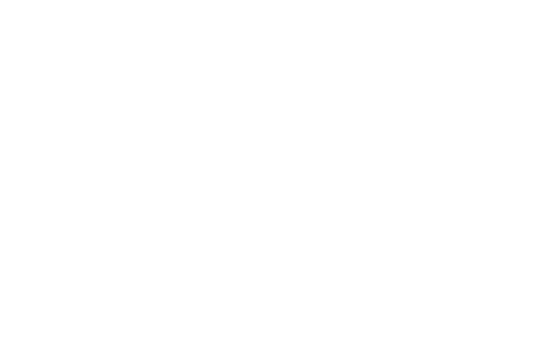

In [110]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots()
im = plt.imshow(img_list[0, :, :])

# initialization function: plot the background of each frame
def init():
    im.set_data(np.ones(shape))
    return [im]

# animation function.  This is called sequentially
def animate(i):
    im.set_array(img_list[i, :, :])
    return [im]

ani = FuncAnimation(fig, animate, frames=img_list.shape[0], blit=True, interval=time_res)
#ani.save("TLI.gif", dpi=300, writer=PillowWriter(fps=25))
html = display.HTML(ani.to_jshtml())
display.display(html)
plt.close()

In [92]:
%matplotlib inline

In [93]:
img_sum = np.sum(img_list, axis=0)

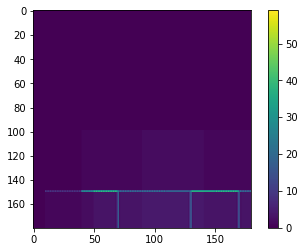

In [94]:
m = plt.imshow(img_sum)
plt.colorbar(mappable=m)

# ax = plt.gca();

# # Major ticks
# ax.set_xticks(np.arange(0, shape[0], 1))
# ax.set_yticks(np.arange(0, shape[1], 1))

# # Labels for major ticks
# ax.set_xticklabels(np.arange(0, shape[0], 1))
# ax.set_yticklabels(np.arange(0, shape[1], 1))

# ax.set_xticks(np.arange(-.5, shape[0], 1), minor=True)
# ax.set_yticks(np.arange(-.5, shape[1], 1), minor=True)
#plt.grid(which='minor', color='w', linestyle='-', linewidth=0.1)

In [95]:
events = convert2event_stream(img_list)

In [104]:
np.savetxt("events_synt.txt", events)

array([ 0., 40., 99.,  1.])

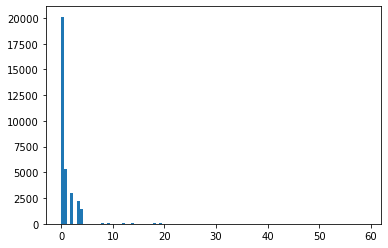

In [97]:
plt.hist(img_sum.flatten(), 100);

In [98]:
def img_from_events(events, shape):
    img = np.zeros(shape)
    for e in events:
        if e[3] == 0:
            continue
        x = int(e[1])
        y = int(e[2])
        img[y, x] = e[0]
    return img

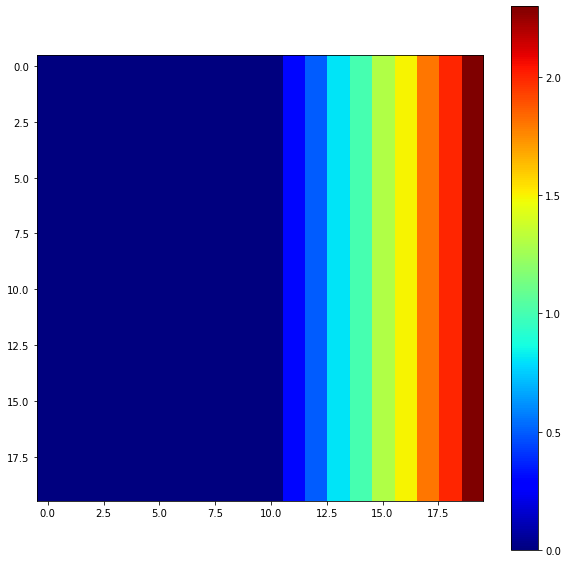

In [99]:
plt.figure(figsize=(10, 10))
m = plt.imshow(img_from_events(events, shape)[160:,:20], interpolation="none", cmap="jet")
plt.colorbar(mappable=m)

# ax = plt.gca();

# # Major ticks
# ax.set_xticks(np.arange(0, shape[0], 1))
# ax.set_yticks(np.arange(0, shape[1], 1))

# # Labels for major ticks
# ax.set_xticklabels(np.arange(0, shape[0], 1))
# ax.set_yticklabels(np.arange(0, shape[1], 1))

# ax.set_xticks(np.arange(-.5, shape[0], 1), minor=True)
# ax.set_yticks(np.arange(-.5, shape[1], 1), minor=True)
# plt.grid(which='minor', color='w', linestyle='-', linewidth=1)

In [100]:
last_time = np.zeros(shape)
time_difference = np.zeros(shape)
for e in events:
    if e[3] == 0:
        continue
    
    x = int(e[1])
    y = int(e[2])
    
    last_time[y, x] = e[0]
    
    if x == 0:
        continue
    
    if last_time[y, x-1] != 0:
        time_difference[y, x] = e[0] - last_time[y, x-1]

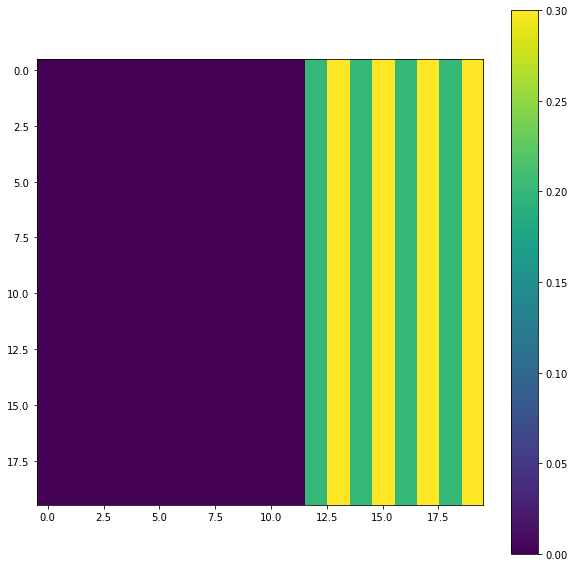

In [101]:
plt.figure(figsize=(10, 10))
m = plt.imshow(time_difference[160:,:20], interpolation="none")
plt.colorbar(mappable=m)
# ax = plt.gca();

# # Major ticks
# ax.set_xticks(np.arange(0, shape[0], 1))
# ax.set_yticks(np.arange(0, shape[1], 1))

# # Labels for major ticks
# ax.set_xticklabels(np.arange(0, shape[0], 1))
# ax.set_yticklabels(np.arange(0, shape[1], 1))

# ax.set_xticks(np.arange(-.5, shape[0], 1), minor=True)
# ax.set_yticks(np.arange(-.5, shape[1], 1), minor=True)
# plt.grid(which='minor', color='w', linestyle='-', linewidth=2)

In [102]:
#shape = (20, 20)
img = plot_line(shape, line_list[0], 0.01)

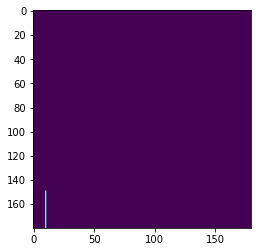

In [103]:
plt.imshow(img)